#Import des modules

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Execute the code below

In [0]:
import pandas as pd
import numpy as np
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


# Merge
First of all, you have to merge both DataFrames to have a bien "df2018" DataFrame with 365 rows and 20 columns (indeed, you can drop the date column in double).



In [0]:
# Your code here :
df2018 = df_main.merge(df_opinion, how='left', left_on='DATE', right_on='date')
df2018.drop(columns='date', inplace=True)
print(df2018.shape)
df2018.head()

(365, 20)


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,122.0,0.0,3.0,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,116.0,0.0,3.0,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,116.0,0.0,3.0,6.9,bad


# Linear regresssion
There are some missing values in the "Sunhour" column, and you want to fill them.

First, you have to split the DataFrame to have :
- a DF with only rows without NaN, you'll call it "df_clean"
- a DF with only rows with NaN in the Sunhour column (The rows you want to fill), you'll call it "df_nan"


In [0]:
# Your code here :
df_clean = df2018.dropna()
print(df_clean.shape)
df_clean.head(2)

(341, 20)


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.5,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.0,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad


In [0]:
df_nan =  df2018[pd.isnull(df2018).any(axis=1)]
print(df_nan.shape)
df_nan.head(2)

(24, 20)


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.0,10,6,5,NaN,NaN,NaN,NaN,NaN
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.5,8,3,2,NaN,NaN,NaN,NaN,NaN


## Now, train your model
With scikit-learn, find the multivariate linear regression model with the best score (remember to train-test-split your DataFrame "df_clean" before!).

Print the R2-score for the test set.

###MODEL 1 : only with temperatures columns
MAX_TEMPERATURE_C	MIN_TEMPERATURE_C	TEMPERATURE_MORNING_C	TEMPERATURE_NOON_C	TEMPERATURE_EVENING_C	

**TRAIN TEST SPLIT**

In [0]:
# Your code here
X1 = df_clean[['MAX_TEMPERATURE_C',	'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',	'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C']]
y1 = df_clean['SUNHOUR']
X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size=0.25, random_state=42)

In [0]:
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(255, 6)
(255,)
(86, 6)
(86,)


**MODEL TRAIN**

In [0]:
#init. model
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**TEST**

In [0]:
model1.score(X1_test, y1_test)

0.551666645037988

###MODEL 2 : some selected columns (temperature, pressure, cloud cover, visibility...)

**TRAIN TEST SPLIT**

In [0]:
# Your code here
X2 = df_clean[['MAX_TEMPERATURE_C',	'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',	'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'PRECIP_TOTAL_DAY_MM',	'VISIBILITY_AVG_KM',	'PRESSURE_MAX_MB',	'CLOUDCOVER_AVG_PERCENT',	'HEATINDEX_MAX_C', 'WINDTEMP_MAX_C', 'UV_INDEX']]
y2 = df_clean['SUNHOUR']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

**MODEL TRAIN**

In [0]:
#init. model
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**TEST**

In [0]:
model2.score(X2_test, y2_test)

0.6705354579562826

###MODEL 3 : ALL numeric columns (non empty in df nan)

**TRAIN TEST SPLIT**

In [0]:
X3 = df_clean[['MAX_TEMPERATURE_C',	'MIN_TEMPERATURE_C',	'WINDSPEED_MAX_KMH',	'TEMPERATURE_MORNING_C',	'TEMPERATURE_NOON_C',	'TEMPERATURE_EVENING_C',	
               'PRECIP_TOTAL_DAY_MM',	'HUMIDITY_MAX_PERCENT',	'VISIBILITY_AVG_KM',	'PRESSURE_MAX_MB',	'CLOUDCOVER_AVG_PERCENT',	'HEATINDEX_MAX_C',	'DEWPOINT_MAX_C',
               'WINDTEMP_MAX_C']]
y3 = df_clean['SUNHOUR']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=42)

**TRAIN**

In [0]:
#init. model
model3 = LinearRegression()
model3.fit(X3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**TEST**

In [0]:
model3.score(X3_test, y3_test)

0.6867969358464602

###MODEL 4 : with an algorithm

In [0]:
df_clean.columns

Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_EVENING',
       'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR', 'OPINION'],
      dtype='object')

In [0]:
col_num = ['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_EVENING',
       'TOTAL_SNOW_MM', 'UV_INDEX']

In [0]:
param_ok = []
maxLR = 0
colLR = 0
for item in col_num :
  X = df_clean[[item]]                                                                    #Pour chaque colonne, on entraine un modèle de régression
  y= df_clean['SUNHOUR']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
  modelLR = LinearRegression().fit(X_train, y_train)                                         

  scoreLR = modelLR.score(X_test, y_test)                                                   #on vérifie le score de ce modèle

  if abs(scoreLR) > 0.4 :                                                                   #on enregistre le nom des colonnes dont le score est supérieur à 0.4 ou inférieur à -0.4 
    param_ok.append(item)

  if abs(scoreLR) > maxLR :                                                                 #on peut aussi savoir quelle est la meilleure colonne (en conservant le max)
    maxLR=scoreLR
    colLR = item


print('Interesting parameters are : \n {}'.format(param_ok))
print('The best fit column for linear regression is : {}, with score = {}'.format(colLR, maxLR))

Interesting parameters are : 
 ['MAX_TEMPERATURE_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C']
The best fit column for linear regression is : TEMPERATURE_EVENING_C, with score = 0.440139659393401


In [0]:
#train test split
X4 = df_clean[['MAX_TEMPERATURE_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C']]
y4 = df_clean['SUNHOUR']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.25, random_state=42)

#data training
model4 = LinearRegression()
model4.fit(X4_train, y4_train)

#test and score
model4.score(X4_test, y4_test)

0.6219027926494535

##Model with the best score

The model with the best score is the model 3, with all the numeric columns

## Predictions
Predict the sunhours values for your DF "df_nan".

In [0]:
df_nan.shape

(24, 20)

In [0]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 18 to 349
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    24 non-null     object 
 1   MAX_TEMPERATURE_C       24 non-null     int64  
 2   MIN_TEMPERATURE_C       24 non-null     int64  
 3   WINDSPEED_MAX_KMH       24 non-null     int64  
 4   TEMPERATURE_MORNING_C   24 non-null     int64  
 5   TEMPERATURE_NOON_C      24 non-null     int64  
 6   TEMPERATURE_EVENING_C   24 non-null     int64  
 7   PRECIP_TOTAL_DAY_MM     24 non-null     float64
 8   HUMIDITY_MAX_PERCENT    24 non-null     int64  
 9   VISIBILITY_AVG_KM       24 non-null     float64
 10  PRESSURE_MAX_MB         24 non-null     int64  
 11  CLOUDCOVER_AVG_PERCENT  24 non-null     float64
 12  HEATINDEX_MAX_C         24 non-null     int64  
 13  DEWPOINT_MAX_C          24 non-null     int64  
 14  WINDTEMP_MAX_C          24 non-null     in

In [0]:
# Your code here :

# data on which the model will work
Xp = df_nan[['MAX_TEMPERATURE_C',	'MIN_TEMPERATURE_C',	'WINDSPEED_MAX_KMH',	'TEMPERATURE_MORNING_C',	'TEMPERATURE_NOON_C',	'TEMPERATURE_EVENING_C',	
               'PRECIP_TOTAL_DAY_MM',	'HUMIDITY_MAX_PERCENT',	'VISIBILITY_AVG_KM',	'PRESSURE_MAX_MB',	'CLOUDCOVER_AVG_PERCENT',	'HEATINDEX_MAX_C',	'DEWPOINT_MAX_C',
               'WINDTEMP_MAX_C']]

# prediction with model3
predict_SH = model3.predict(Xp)
predict_SH

24

In [0]:
df_nan['SUNHOUR'] = predict_SH

### Some checking

In [0]:
df_nan.head(2)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.0,10,6,5,NaN,NaN,NaN,7.404351,NaN
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.5,8,3,2,NaN,NaN,NaN,8.123330,NaN


In [0]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 18 to 349
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    24 non-null     object 
 1   MAX_TEMPERATURE_C       24 non-null     int64  
 2   MIN_TEMPERATURE_C       24 non-null     int64  
 3   WINDSPEED_MAX_KMH       24 non-null     int64  
 4   TEMPERATURE_MORNING_C   24 non-null     int64  
 5   TEMPERATURE_NOON_C      24 non-null     int64  
 6   TEMPERATURE_EVENING_C   24 non-null     int64  
 7   PRECIP_TOTAL_DAY_MM     24 non-null     float64
 8   HUMIDITY_MAX_PERCENT    24 non-null     int64  
 9   VISIBILITY_AVG_KM       24 non-null     float64
 10  PRESSURE_MAX_MB         24 non-null     int64  
 11  CLOUDCOVER_AVG_PERCENT  24 non-null     float64
 12  HEATINDEX_MAX_C         24 non-null     int64  
 13  DEWPOINT_MAX_C          24 non-null     int64  
 14  WINDTEMP_MAX_C          24 non-null     in

In [0]:
df_nan['SUNHOUR'].unique() == predict_SH

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

## Concatenate and scatterplot

Concatenate both DataFrames to a new one "df2018complete", and draw a scatterplot with Date on X-axis and Sunhours on Y-axis.

In [0]:
# Your code here
df2018complete = pd.concat([df_clean, df_nan])

In [0]:
df2018complete.head(2)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.5,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.0,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad


In [0]:
df2018complete.tail(2)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
346,2018-12-13,3,2,23,3,3,2,1.4,86,8.875,1014,88.875,3,1,-3,NaN,NaN,NaN,4.381186,NaN
349,2018-12-16,12,7,23,7,12,9,1.6,91,10.000,1015,48.375,12,7,6,NaN,NaN,NaN,7.243871,NaN


In [0]:
df2018complete.sort_values(by='DATE', inplace=True)

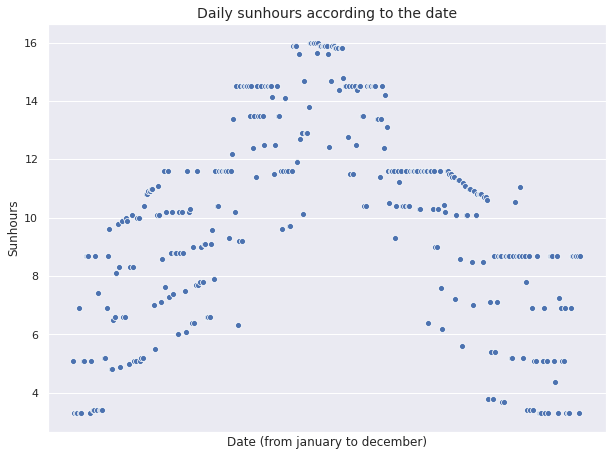

In [0]:
#Scatterplot
sns.set()

plt.figure(figsize=(10, 7.5))

sns.scatterplot('DATE', 'SUNHOUR', data=df2018complete)
plt.xticks([])
plt.xlabel('Date (from january to december)')
plt.ylabel('Sunhours')
plt.title('Daily sunhours according to the date', fontsize=14)

plt.show()